In [47]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
# https://data.sfgov.org/Public-Safety/SFPD-Incidents-Current-Year-2015-/ritf-b9ki
df = pd.read_csv("DATAFILE.csv")

In [49]:
df.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

In [50]:
df.tail(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
156541,90578136,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,05/22/2015 12:00:00 AM,11:30,INGLESIDE,NONE,500 Block of FRANCONIA ST,-122.408153,37.741776,"(37.7417759604289, -122.408153165952)",9057813607021
156542,981021761,WARRANTS,WARRANT ARREST,Wednesday,09/30/2015 12:00:00 AM,23:53,NORTHERN,"ARREST, BOOKED",OLIVE ST / VANNESS AV,-122.421097,37.784294,"(37.7842937802977, -122.421096796936)",98102176163010


In [51]:
df['DateInTS'] = map(lambda x: datetime.strptime(x,"%m/%d/%Y %H:%M:%S %p"),df['Date'])

In [52]:
df['Month'] = map(lambda x: datetime.strftime(x,'%m'),df['DateInTS'])

In [53]:
df_ts = df.groupby('Month').aggregate(len)["IncidntNum"]

In [54]:
df_ts

Month
01    13614
02    12329
03    13929
04    12963
05    13729
06    13304
07    13365
08    13730
09    12896
10    13152
11    12091
12    11441
Name: IncidntNum, dtype: int64

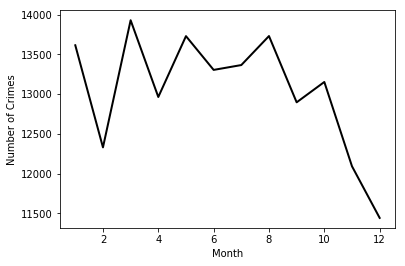

In [55]:
plt.plot(df_ts.index,df_ts.values,'-k',lw=2)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")

In [56]:
import numpy as np

In [59]:
window1 = (datetime(2015,3,22),datetime(2015,6,21))

In [68]:
window1[0]

datetime.datetime(2015, 3, 22, 0, 0)

In [67]:
df_ts.index

Index([u'01', u'02', u'03', u'04', u'05', u'06', u'07', u'08', u'09', u'10',
       u'11', u'12'],
      dtype='object', name=u'Month')

In [110]:
idx_window = np.where(map(lambda x: x>=datetime.strftime(window1[0],'%m') and x<=datetime.strftime(window1[1],'%m'),df_ts.index))[0]

In [111]:
mean_window = np.mean(df_ts.values[idx_window])

In [112]:
std_window = np.std(df_ts.values[idx_window])

In [113]:
window2 = (datetime(2015,7,22),datetime(2013,9,21))

In [114]:
idx_window2 = np.where(map(lambda x: x>=datetime.strftime(window2[0],'%m') and x<=datetime.strftime(window2[1],'%m'), df_ts.index))[0]

In [115]:
mean_wdiff = mean_window - np.mean(df_ts.values[idx_window2])

In [116]:
std_wdiff = std_window - np.std(df_ts.values[idx_window2])

In [118]:
mean_wdiff


-3105.416666666657

In [119]:
std_wdiff

1796.2202559362463

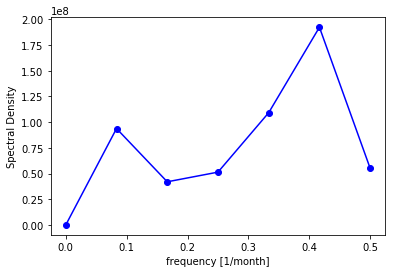

In [120]:

import scipy.signal

# compute the periodogram
f, psd = scipy.signal.periodogram(df_ts, detrend='linear')
plt.plot(f, psd,'-ob')
plt.xlabel('frequency [1/month]')
plt.ylabel('Spectral Density')
plt.show()

# Features:
# period of highest psd peak:
period_psd1 = 1./f[np.argmax(psd)] # = 47.0 months

# sum of spectral density higher than 1/12 months
sdens_gt_12m = np.sum(psd[f > 1./12])
# ratio of spectral density higher than to less than 1/12 months
sdens_ratio_12m = float(sdens_gt_12m) / np.sum(psd[f <= 1./12])

In [123]:
period_psd1 


2.4000000000000004

In [124]:
sdens_gt_12m

449983570.99467206

In [125]:
sdens_ratio_12m

4.7984860242932657